## Проверка однородности. Независимые выборки

Посмотрим, как применять критерии однородности для независимых выборок. Все критерии, которые мы изучали, уже реализованы в Python.

In [2]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# и зафиксируем seed
np.random.seed(21)

В файле **aggress.xls** содержаться бальные оценки агресивности детей 4-х лет, проявленной в течении 15-ти минут после игры. Первые 12 детей — мальчики, остальные 12 детей — девочки. Необходимо проверить гипотезу однородности мальчиков и девочек.

In [8]:
# сначала импортируем данные

data = pd.read_excel('../HW3_Data/employees.xls')

In [10]:
# посмотрим на них 

data.head()

,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
Alexander,Female,Ship,College,22,63,4,23400,82,90
Arcones,Male,Package,College,49,65,17,40400,89,123
Barber,Male,Bake,College,36,67,8,29400,77,93
Barrera,Male,Package,HS,37,67,3,24800,102,108
Bester,Male,Ship,Grad,43,66,11,31200,82,104


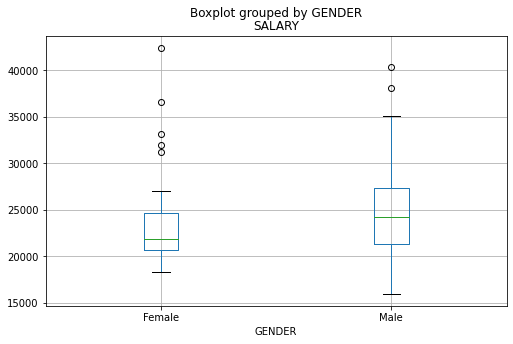

In [11]:
# Перед анализом данных полезно визулизировать данные. 
# Это позволит получить какой-то априорный вывод о данных и избежать ошибок в дальнейшем 
# (например, при вызове функций с неправильными альтернативами). 
#
# Для визуализации различий лучше всего использовать "ящик с усами" (boxplot)

data.boxplot(column='SALARY', by='GENDER',figsize=(8,5))
plt.show()

In [14]:
# Теперь извлечем разделим данные для мальчиков и девочек.
# Преобразовывать в numpy array здесь вовсе не обязательно (это удобно только при оценке параметра сдвига).

sample1 = data[data['GENDER'] == 'Female']['SALARY'] #.to_numpy()
sample2 = data[data['GENDER'] == 'Male']['SALARY'] #.to_numpy()

### Критерий Колмогорова-Смирнова

Начнем с критерия Колмогорова-Смирнова. Этот критерий проверяет простую гипотезу о равенстве двух (непрерывных!) функций распределений, из которых получены выборки, против любой альтернативы. Он реализован с помощью функции ks_2samp в модуле stats:

* **stats.ks_2samp(sample1, sample2, alternative)** — тут sample1 и sample2 — реализации первой и второй выборки, а alternative — альтернатива, которая используется. По умолчанию alternative=‘two-sided’; другие варианты: ‘less’ и ‘greater’. 

Обратите внимание, что альтернатива формулируется для функций распределений, то есть если мы хотим проверить одностороннюю гипотезу о том, что вторая выборка стохастически принимает большие значения, необходимо использовать alternative=‘less’.

In [15]:
stats.ks_2samp(sample1,sample2)

KstestResult(statistic=0.21372467961967756, pvalue=0.18395287571687302)

In [16]:
stats.ks_2samp(sample1,sample2, alternative='less')

KstestResult(statistic=0.10582885489871847, pvalue=0.5320275232929083)

In [17]:
stats.ks_2samp(sample1,sample2, alternative='greater')

KstestResult(statistic=0.21372467961967756, pvalue=0.09203176675750027)

А можно ли применять критерий Колмогорова-Смирнова для этих данных? Ответ: скорее нет, чем да (данные дискретны).

### Критерий Манна-Уитни

Перейдем к критерию Манна-Уитни. Этот критерий проверяет простую гипотезу о равенстве двух функций распределений, из которых получены выборки, против альтернативы доминирования (!). Он реализован с помощью функции mannwhitneyu в модуле stats:

* **stats.mannwhitneyu(sample1, sample2, alternative)** — тут sample1 и sample2 — реализации первой и второй выборки, а alternative — альтернатива, которая используется. По умолчанию alternative=None; другие варианты: ‘two-sided’, ‘less’ и ‘greater’. 

Официальная документация говорит, что alternative=None оставлена только для совместимости со старыми версиями реализации этого критерия.

Правильно, конечно, использовать односторонние версии критерия Манна-Уитни. Обратите внимание, что в отличие от критерия Колмогорова, тут альтернатива формулируется уже для выборок, то есть если мы хотим проверить одностороннюю гипотезу о том, что вторая выборка стохастически принимает большие значения, необходимо использовать alternative=‘greater’.

In [18]:
stats.mannwhitneyu(sample1,sample2)

MannwhitneyuResult(statistic=1028.5, pvalue=0.10291049933163238)

In [19]:
stats.mannwhitneyu(sample1,sample2, alternative='two-sided')

MannwhitneyuResult(statistic=1028.5, pvalue=0.20582099866326475)

In [20]:
stats.mannwhitneyu(sample1,sample2, alternative='greater')

MannwhitneyuResult(statistic=1028.5, pvalue=0.8983399967239893)

In [21]:
stats.mannwhitneyu(sample1,sample2, alternative='less')

MannwhitneyuResult(statistic=1028.5, pvalue=0.10291049933163238)

### Критерий Стьюдента ($t$-тест)

Мы еще изучали параметрические критерии Стьюдента для независимых выборок (Z-критерий и t-критерий). Эти критерии проверяют простую гипотезу о равенстве средних двух нормальных распределений против любой альтернативы. Z-критерий мы не будем рассматривать, так как для него необходимо знать дисперсию (которая никогда не является известной). А t-критерий частично реализован с помощью функции ttest_ind:

* **stats.ttest_ind(sample1, sample2, equal_var)** — t-критерий для случая независимых выборок. Тут sample1 и sample2 — реализации первой и второй выборки, а equal_var булевая переменная, которая связана с предположением равенства дисперсии. По умолчанию она принимает значение True, но лучше использовать False, чтобы запускался аппроксимационный критерий (Уэлча), а не точный (Стьюдента).

Различные альтернативы, к сожалению, пока не реализованы. 

Конечно, перед применением критерия Стьюдента необходимо проверить нормальность данных.

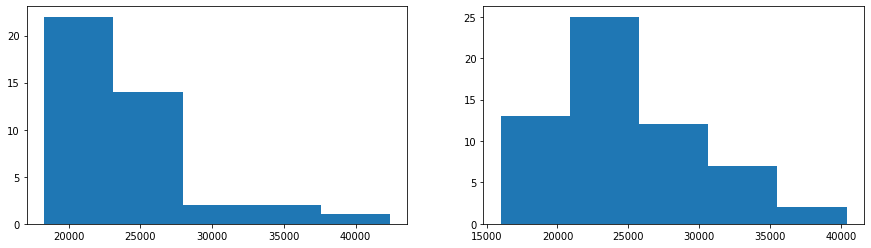

In [22]:
# посмотрим на гистограмму

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

ax1.hist(sample1, bins=5)
ax2.hist(sample2, bins=5)

plt.show()

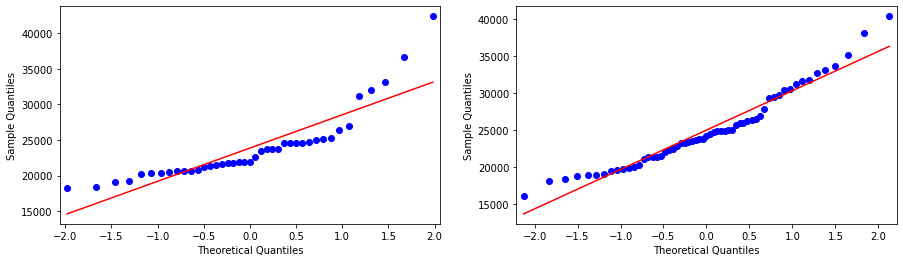

In [23]:
# посмотрим на qqplot

from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2)

plt.show()

Конечно, ни о какой нормальности в этих данный и не идет речь. Тем не менее попробуем применить критерий Стьюдента.

In [24]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-1.0761193318360134, pvalue=0.28451599063450816)

### Оценка параметра "сдвига"

С помощью "ящиков с усами" мы заметили, что после игры агресивность мальчиков больше, чем у девочек. С помощью критериев однородности, мы убедились, что эти различия значимы. Теперь давайте ответим на вопрос: а на сколько в среднем агресивность мальчиков больше, чем у девочек? Для этого лучше всего использовать медиану попарных разностей.

In [26]:
np.median([[sample2[i] - sample1[j] for j in range(len(sample1))] for i in range(len(sample2))]) 

1100.0